# PyTorch Intro
PyTorch is a library for building neural network layers in Python


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression Example

In [6]:
# Generate a dataset
n = 100
w_target = 2.0
b_target = 1.0

X = np.linspace(-1, 1, n)
Y = w_target * X + b_target + np.random.randn(n) * 0.75

X_torch = torch.from_numpy(X).float() # numpy defaults to float64
Y_torch = torch.from_numpy(Y).float() # pytorch defaults to float32

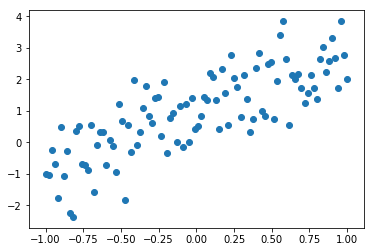

In [7]:
# Let's visualize it
plt.scatter(X,Y)
plt.show()

In [8]:
d = 1

# create our model
W = torch.zeros(d, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

def model(x):
    return W * x + b

print(W)
print(b)

tensor([0.], requires_grad=True)
tensor(0., requires_grad=True)


In [9]:
# define our loss function
loss_fn = torch.nn.MSELoss()

# create an optimizer and pass our parameters in
optim = torch.optim.SGD([W, b], lr=0.1)


In [10]:
for i in range(200):
    y_hat = model(X_torch)
    
    loss = loss_fn(y_hat, Y_torch)
    
    if i % 20 == 0:
        print('i', i, 'loss', loss.item())
    
    optim.zero_grad() # important!
    loss.backward()
    optim.step()


i 0 loss 2.7309443950653076
i 20 loss 0.7329359650611877
i 40 loss 0.6714812517166138
i 60 loss 0.667816698551178
i 80 loss 0.6675976514816284
i 100 loss 0.6675845980644226
i 120 loss 0.6675838232040405
i 140 loss 0.6675837635993958
i 160 loss 0.6675837635993958
i 180 loss 0.6675837635993958


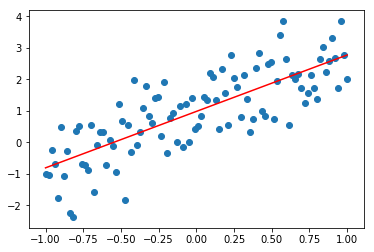

1.7915337085723877 0.9858402013778687


In [11]:
y_hat = model(X_torch).detach().numpy()
plt.scatter(X, Y)
plt.plot(X, y_hat, c='r')
plt.show()
print(W.item(), b.item())

## Logistic Regression Example

In [12]:
# create two clusters
n = 100
positives = np.random.normal(loc=(-1,-1), size=(n//2,2))
negatives = np.random.normal(loc=(1,1), size=(n//2,2))

X = np.concatenate([positives,negatives], axis=0)
Y = np.zeros(n)
Y[50:] = 1
X_torch = torch.from_numpy(X).float() # numpy defaults to float64
Y_torch = torch.from_numpy(Y).long() # pytorch defaults to float32

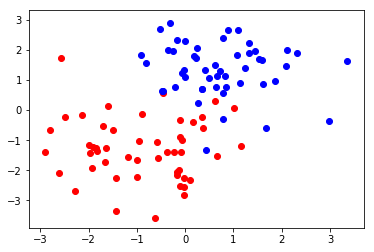

In [13]:
plt.scatter(positives[:,0], positives[:,1], c='r')
plt.scatter(negatives[:,0], negatives[:,1], c='b')
plt.show()

In [20]:
d = 2

# create our model
W = torch.zeros(d, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

def logistic_model(x):
    pos = torch.sigmoid(x @ W + b)
    neg = 1-pos
    return torch.log(torch.stack([pos, neg], dim=1))

In [21]:
# define our loss function
# expects log softmax for numerical stability
# https://pytorch.org/docs/stable/nn.html#torch.nn.NLLLoss
loss_fn = torch.nn.NLLLoss() 

# create an optimizer and pass our parameters in
optim = torch.optim.SGD([W, b], lr=0.1)


In [22]:
for i in range(200):
    y_hat = logistic_model(X_torch)
    loss = loss_fn(y_hat, Y_torch)
    
    if i % 20 == 0:
        print('i', i, 'loss', loss.item())
    
    optim.zero_grad() # important!
    loss.backward()
    optim.step()


i 0 loss 0.6931465864181519
i 20 loss 0.2873740494251251
i 40 loss 0.22034400701522827
i 60 loss 0.1932007372379303
i 80 loss 0.1783878654241562
i 100 loss 0.16901206970214844
i 120 loss 0.16252540051937103
i 140 loss 0.15776327252388
i 160 loss 0.1541162133216858
i 180 loss 0.15123368799686432


In [23]:
x = np.linspace(-5, 5, 100)
y = -(b.item() + W[0].item() * x) / W[1].item()
print(W)
print(b)

tensor([-1.2362, -1.8209], requires_grad=True)
tensor(0.1071, requires_grad=True)


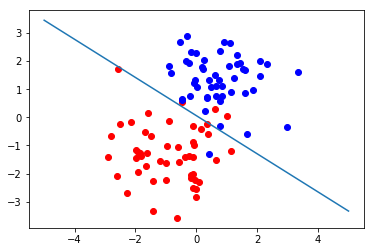

In [24]:
plt.scatter(positives[:,0], positives[:,1], c='r')
plt.scatter(negatives[:,0], negatives[:,1], c='b')
plt.plot(x,y)
plt.show()